In [1]:
import pandas as pd

In [2]:
info_df = pd.read_csv(r"/content/drive/MyDrive/datasets/Train Delay Prediction/train_info.csv")
schedule_df = pd.read_csv(r"/content/drive/MyDrive/datasets/Train Delay Prediction/train_schedule.csv")
delay_df = pd.read_csv(r"/content/drive/MyDrive/datasets/Train Delay Prediction/train delay data.csv")

In [10]:
info_df.columns = info_df.columns.str.strip()
schedule_df.columns = schedule_df.columns.str.strip()
delay_df.columns = delay_df.columns.str.strip()


In [11]:
print("Schedule Sample:\n", schedule_df[['Train_No', 'Station_Code', 'Arrival_time', 'Departure_Time']].head(), "\n")
print("Delay Data Sample:\n", delay_df[['Train Type', 'Day of the Week', 'Time of Day', 'Historical Delay (min)']].head())

Schedule Sample:
    Train_No Station_Code Arrival_time Departure_Time
0       107          SWV     00:00:00       10:25:00
1       107         THVM     11:06:00       11:08:00
2       107         KRMI     11:28:00       11:30:00
3       107          MAO     12:10:00       00:00:00
4       108          MAO     00:00:00       20:30:00 

Delay Data Sample:
   Train Type Day of the Week Time of Day  Historical Delay (min)
0    Express          Monday     Morning                       5
1  Superfast         Tuesday   Afternoon                      10
2      Local       Wednesday     Evening                      15
3    Express        Thursday       Night                       2
4  Superfast          Friday     Morning                       8


In [12]:
from datetime import datetime

def convert_time(val):
    try:
        return datetime.strptime(val, "%H:%M:%S").time()
    except:
        return None

schedule_df['Arrival_time'] = schedule_df['Arrival_time'].apply(convert_time)
schedule_df['Departure_Time'] = schedule_df['Departure_Time'].apply(convert_time)

In [13]:
delay_df['Historical Delay (min)'] = pd.to_numeric(delay_df['Historical Delay (min)'], errors='coerce')
delay_df.dropna(subset=['Historical Delay (min)'], inplace=True)


In [14]:
print("Cleaned Schedule:\n", schedule_df[['Train_No', 'Station_Code', 'Arrival_time', 'Departure_Time']].head(), "\n")
print("Cleaned Delay Data:\n", delay_df.head())

Cleaned Schedule:
    Train_No Station_Code Arrival_time Departure_Time
0       107          SWV     00:00:00       10:25:00
1       107         THVM     11:06:00       11:08:00
2       107         KRMI     11:28:00       11:30:00
3       107          MAO     12:10:00       00:00:00
4       108          MAO     00:00:00       20:30:00 

Cleaned Delay Data:
    Distance Between Stations (km) Weather Conditions Day of the Week  \
0                             100              Clear          Monday   
1                             150              Rainy         Tuesday   
2                             200              Foggy       Wednesday   
3                              50              Clear        Thursday   
4                              75              Rainy          Friday   

  Time of Day Train Type  Historical Delay (min) Route Congestion  
0     Morning    Express                       5              Low  
1   Afternoon  Superfast                      10           Medium  
2  

In [15]:
stops_per_train = schedule_df.groupby('Train_No')['Station_Code'].count().reset_index(name='Num_Stops')

In [16]:
top_stops = stops_per_train.sort_values(by='Num_Stops', ascending=False).head(10)

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-19-3695992600.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_stops, x='Train_No', y='Num_Stops', palette='Blues_d')


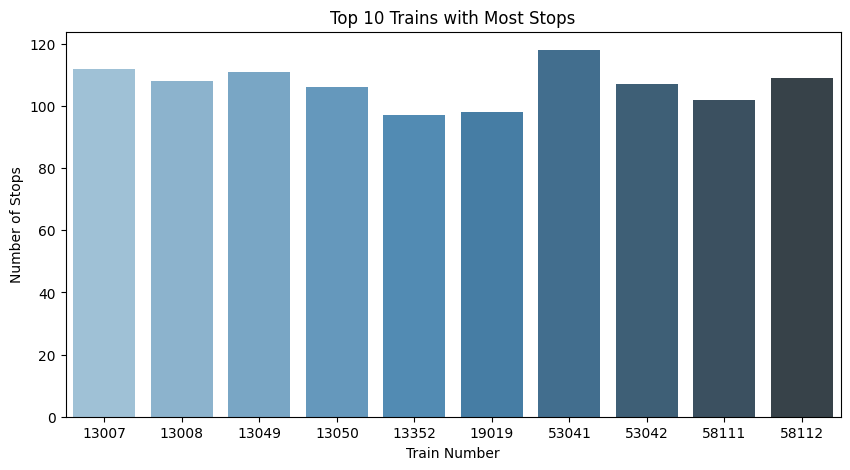

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_stops, x='Train_No', y='Num_Stops', palette='Blues_d')
plt.title("Top 10 Trains with Most Stops")
plt.xlabel("Train Number")
plt.ylabel("Number of Stops")
plt.show()

/tmp/ipython-input-20-2903956538.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_distance, x='Train_No', y='Distance', palette='Purples')


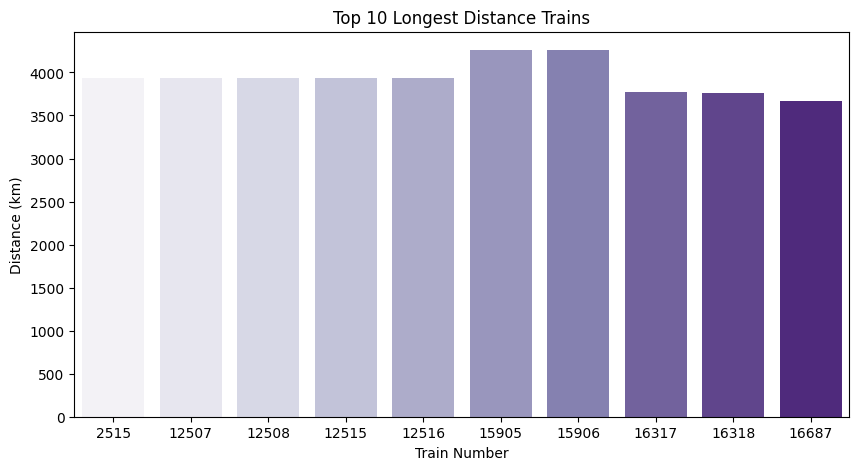

In [20]:
distance_per_train = schedule_df.groupby('Train_No')['Distance'].last().reset_index()
distance_per_train['Distance'] = pd.to_numeric(distance_per_train['Distance'], errors='coerce')

top_distance = distance_per_train.sort_values(by='Distance', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_distance, x='Train_No', y='Distance', palette='Purples')
plt.title("Top 10 Longest Distance Trains")
plt.xlabel("Train Number")
plt.ylabel("Distance (km)")
plt.show()

/tmp/ipython-input-26-1988156675.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_type_delay, x='Train Type', y='Historical Delay (min)', palette='Set2')


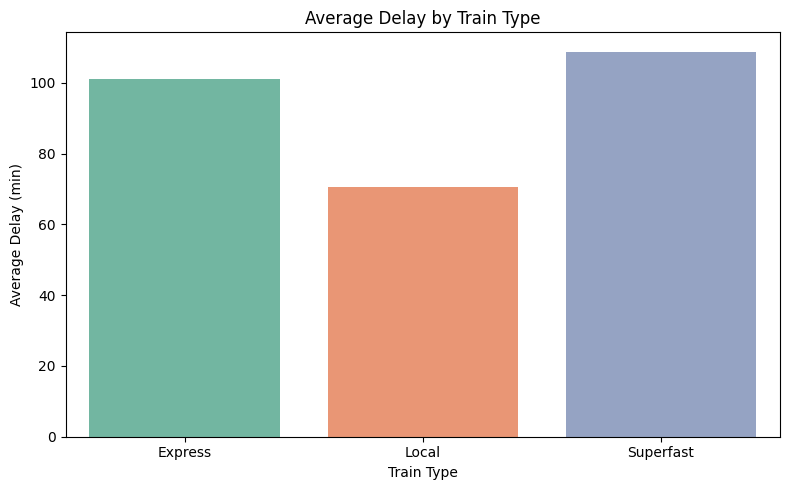

In [26]:
train_type_delay = delay_df.groupby('Train Type')['Historical Delay (min)'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=train_type_delay, x='Train Type', y='Historical Delay (min)', palette='Set2')
plt.title("Average Delay by Train Type")
plt.xlabel("Train Type")
plt.ylabel("Average Delay (min)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-25-3086537212.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daywise_delay = delay_df.groupby('Day of the Week')['Historical Delay (min)'].mean().reset_index()


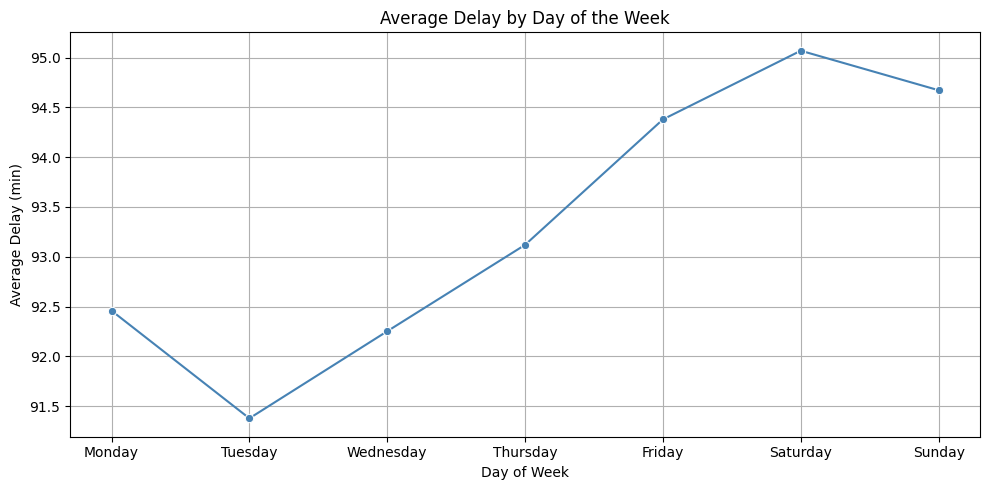

In [25]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
delay_df['Day of the Week'] = pd.Categorical(delay_df['Day of the Week'], categories=ordered_days, ordered=True)

daywise_delay = delay_df.groupby('Day of the Week')['Historical Delay (min)'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=daywise_delay, x='Day of the Week', y='Historical Delay (min)', marker='o', color='steelblue')
plt.title("Average Delay by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Delay (min)")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-28-521858788.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ontime_by_type, x='Train Type', y='On_Time (%)', palette='YlGn')


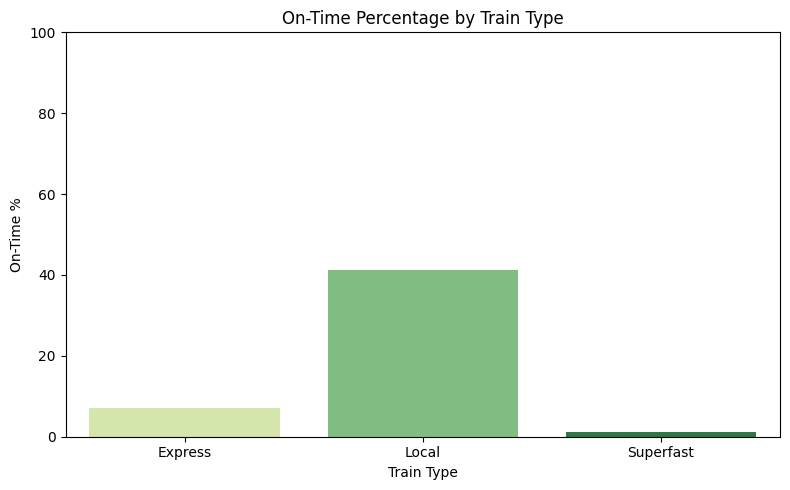

/tmp/ipython-input-28-521858788.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ontime_by_day = delay_df.groupby('Day of the Week')['On_Time'].mean().reset_index()


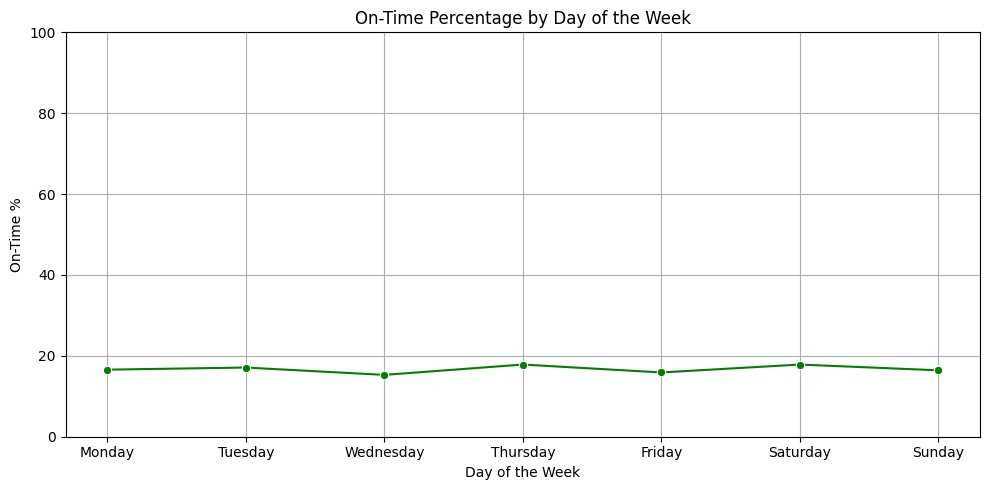

In [28]:
delay_df['On_Time'] = delay_df['Historical Delay (min)'] <= 5

ontime_by_type = delay_df.groupby('Train Type')['On_Time'].mean().reset_index()
ontime_by_type['On_Time (%)'] = ontime_by_type['On_Time'] * 100

plt.figure(figsize=(8,5))
sns.barplot(data=ontime_by_type, x='Train Type', y='On_Time (%)', palette='YlGn')
plt.title("On-Time Percentage by Train Type")
plt.xlabel("Train Type")
plt.ylabel("On-Time %")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
delay_df['Day of the Week'] = pd.Categorical(delay_df['Day of the Week'], categories=ordered_days, ordered=True)

ontime_by_day = delay_df.groupby('Day of the Week')['On_Time'].mean().reset_index()
ontime_by_day['On_Time (%)'] = ontime_by_day['On_Time'] * 100

plt.figure(figsize=(10,5))
sns.lineplot(data=ontime_by_day, x='Day of the Week', y='On_Time (%)', marker='o', color='green')
plt.title("On-Time Percentage by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("On-Time %")
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

delay_model_df = delay_df.copy()

for col in ['Weather Conditions', 'Day of the Week', 'Time of Day', 'Train Type', 'Route Congestion']:
    delay_model_df[col] = LabelEncoder().fit_transform(delay_model_df[col])

delay_model_df.head()

,Distance Between Stations (km),Weather Conditions,Day of the Week,Time of Day,Train Type,Historical Delay (min),Route Congestion
0,100,0,1,2,0,5,1
1,150,2,5,0,2,10,2
2,200,1,6,1,1,15,0
3,50,0,4,3,0,2,1
4,75,2,0,2,2,8,2


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

X = delay_model_df.drop(columns=['Historical Delay (min)'])
y = delay_model_df['Historical Delay (min)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.9307545595233866
MAE: 31.20301970266423
